# 2.3 Clustering

http://scikit-learn.org/stable/modules/clustering.html

## K-means
Clusters data by seperating samples in k groups of equal variance. Inertia is the within cluster sum of squares. Scales well to large sample datasets.

Centroids are chosen to minimize the inertia. Each cluster is described by the mean of the samples in the cluster, the centroid. The inertia is the sum distance between samples in a cluster and the cluster centroid.

- Responds poorly to elongated clusters, or manifolds with irregular shapes.

- High dimensionality reduces effectiveness. PCA alleviates this problem.

### K-Means for Categorical Data

https://www.quora.com/Why-does-K-means-clustering-perform-poorly-on-categorical-data-The-weakness-of-the-K-means-method-is-that-it-is-applicable-only-when-the-mean-is-defined-one-needs-to-specify-K-in-advance-and-it-is-unable-to-handle-noisy-data-and-outliers/answer/Shehroz-Khan-2

Categorical variables are enumerated such as "banana","apple", and "car". Eudlidean distance metrics do not incode similairity in this case. Some other similarity metrics that might be useful Hamming Distance (if categorical variables are the same than distance is 0 else 1) In this way categorical variables are only considered to be similar if they are the same. Another solution is to compute mode rather than median for the desctiption of each centroid. Thus the most used category is considered the centroid representative.

##### K-Modes algorithm
http://www.cse.ust.hk/~qyang/537/Papers/huang98extensions.pdf

Uses a matching dissimilarity measure(Hamming) and replaces means of cluster with modes.




### KMeans Combined with PCA

https://stats.stackexchange.com/questions/157621/how-would-pca-help-with-a-k-means-clustering-analysis




## Implementation in Sklearn

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.datasets import load_iris


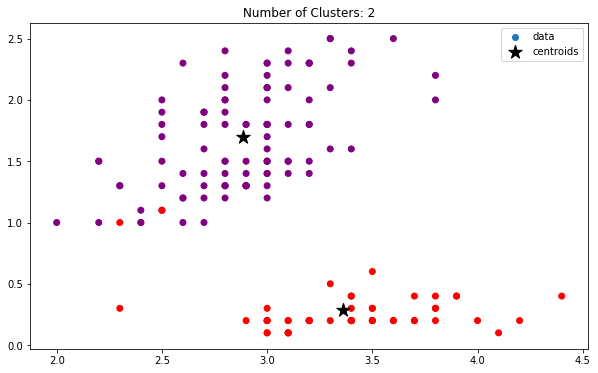

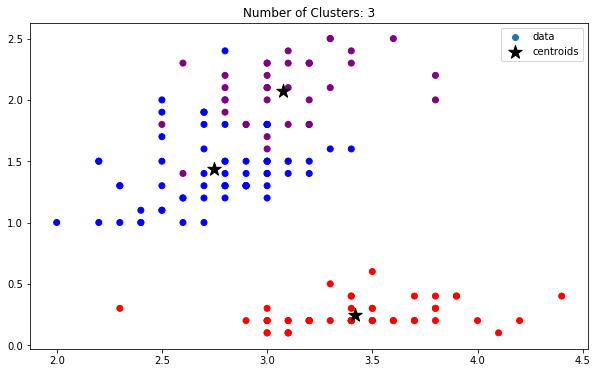

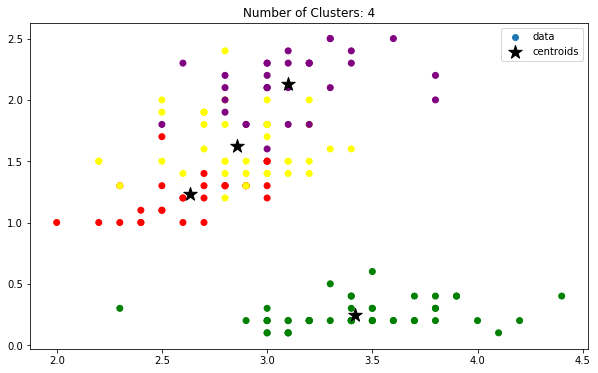

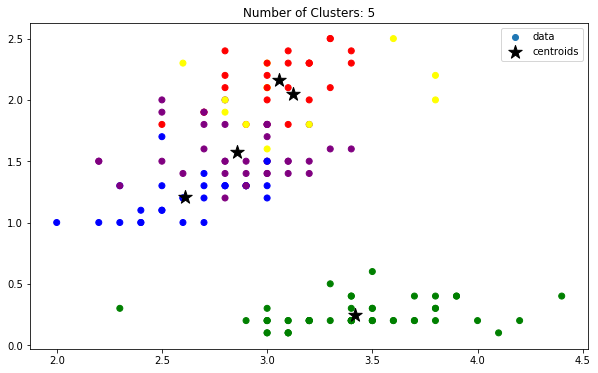

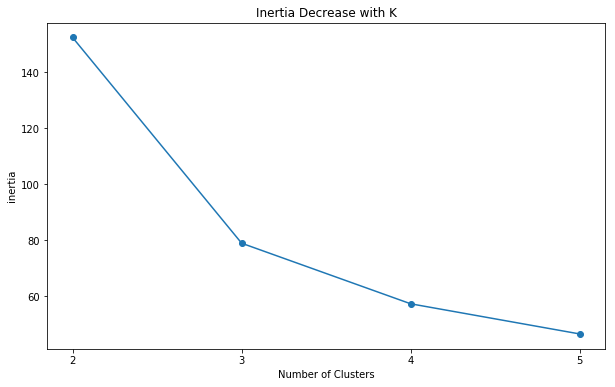

In [76]:
from sklearn.cluster import KMeans
from matplotlib.colors import ListedColormap as lcm


inertia = []
for x in range(2,6):
    km = KMeans(n_clusters = x)
    labels = km.fit_predict(X)
    plt.figure(figsize = (10,6))
    plt.scatter(X.iloc[:,1], X.iloc[:,3], c=labels, cmap = lcm(['red','green','blue','yellow','purple']), label = 'data')
    plt.scatter(km.cluster_centers_[:,1], km.cluster_centers_[:,3], marker='*', c = 'black',s = 200, label = 'centroids')
    plt.title( 'Number of Clusters: ' +str(x))
    plt.legend()
    plt.show()
    inertia.append(km.inertia_)
def inerta_plot( X):
    plt.figure(figsize = (10,6))
    plt.plot(range(2,6), inertia, marker = 'o')
    plt.xlabel('Number of Clusters')
    plt.ylabel('inertia')
    plt.title('Inertia Decrease with K')
    plt.xticks([2,3,4,5])
    plt.show()
    
inertia_plot(X)

From the above graph we see that we get the biggest decrease of inertia with K number of clusters set to 3. Inertia being the inner cluster cost function.

### Silhouette Plots
A graphical tool to plot how tightly grouped members of a cluster are. The silhouette coefficient is bounded [-1,1]. The coefficient is 0 if cluster seperation and cohesion are the same. The ideal coefficient 1, is attained when cluster seperation is much much greater than cluster cohesion. 

Clusster cohesion being the average distance between a sample and all other samples in its cluster. cluster seperation the average distance between a sample and all other samples in the nearest cluster.

cohesion is a metric for each sample that describes similarity to its cluster mate, whereas seperation shows that samples dissimilarity from the next closets cluster.

When looking at silhouette plots we want similar lengths and widths in clusters that is closer on average to 1.0

http://scikit-learn.org/stable/auto_examples/cluster/plot_kmeans_silhouette_analysis.html#sphx-glr-auto-examples-cluster-plot-kmeans-silhouette-analysis-py

In [1]:
from matplotlib import cm
from sklearn.metrics import silhouette_samples, silhouette_score

def silh_samp_cluster( X, start=2, stop=5, metric = 'euclidean'):
    # Taken from sebastian Raschkas book Python Machine Learning second edition
    for x in range(start, stop):
        km = KMeans(n_clusters = x)
        y_km = km.fit_predict(X)
        cluster_labels = np.unique(y_km)
        n_clusters = cluster_labels.shape[0]
        silhouette_vals = silhouette_samples(X, y_km, metric = metric)
        y_ax_lower, y_ax_upper =0,0
        yticks = []
        for i, c in enumerate(cluster_labels):
            c_silhouette_vals = silhouette_vals[y_km == c]
            c_silhouette_vals.sort()
            y_ax_upper += len(c_silhouette_vals)
            color = cm.jet(float(i)/n_clusters)
            plt.barh(range(y_ax_lower, y_ax_upper),
                    c_silhouette_vals,
                    height=1.0,
                    edgecolor='none',
                    color = color)
            yticks.append((y_ax_lower + y_ax_upper)/2.)
            y_ax_lower+= len(c_silhouette_vals)
            
        silhouette_avg = np.mean(silhouette_vals)
        plt.axvline(silhouette_avg,
                   color = 'red',
                   linestyle = "--")
        plt.yticks(yticks, cluster_labels+1)
        plt.ylabel("cluster")
        plt.xlabel('Silhouette Coefficient')
        plt.title('Silhouette for ' + str(x) + " Clusters")
        plt.show()
    
silh_samp_cluster(X)

NameError: name 'X' is not defined

Here I might choose 2 clusters instead of three. We see from the silhouette plot that there are clearly more samples in cluster 1, but also quite a few outliers. Also for two clusters the silhouette coefficient it higher on average. implying a high seperation of clusters and a low cluster cohesion (which implies a tightly packed cluster).